<a href="https://colab.research.google.com/github/Pritty05/-RegisterForm/blob/main/Pritty_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

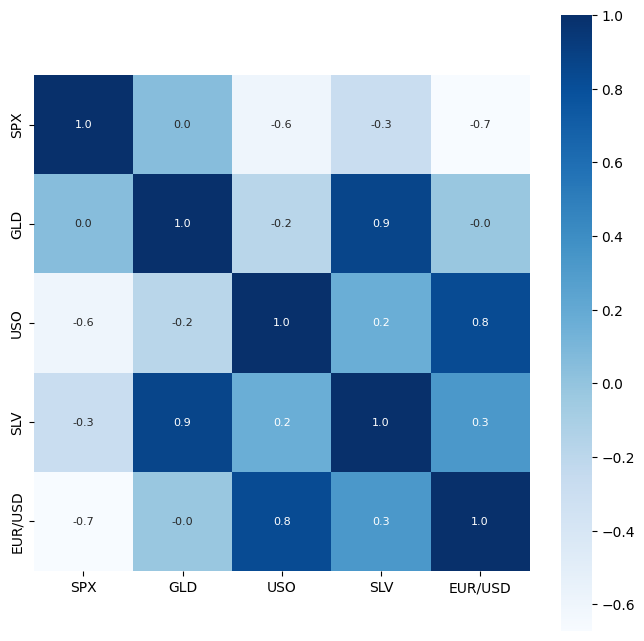

In [12]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

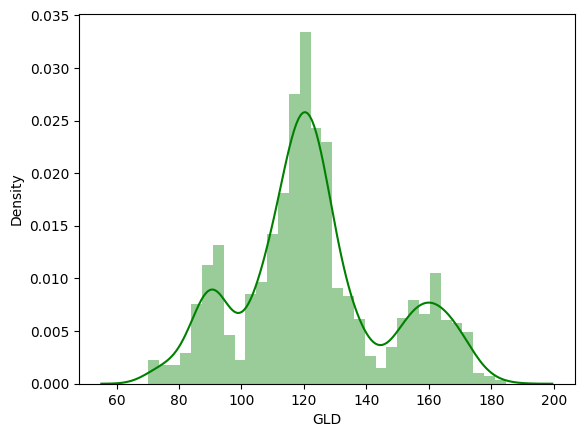

In [15]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

Splitting into Training data and Test Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.74559983  81.99109977 116.13820001 127.68920063 120.88850114
 154.7613977  150.37499785 126.37579972 117.62239867 125.9820002
 116.79680091 171.40810027 141.43349858 167.49619783 114.84260032
 117.36480016 138.15190356 170.19890093 158.86840222 158.60690008
 155.07300044 124.95709994 175.28000016 157.41840259 125.19400027
  94.10649948  77.27350015 120.61930027 119.06349947 167.52019977
  88.22590056 125.31250029  91.1308007  117.74590048 121.05619931
 136.95280125 115.38600167 115.33210068 146.95099897 107.04270083
 104.18210241  87.20479809 126.48120037 117.8838996  154.13579884
 119.6706998  108.42469962 108.10799813  93.17200043 127.04549763
  74.81630026 113.65219931 121.12380002 111.22989895 118.97739933
 120.65319937 159.42680104 167.79780104 146.98679684  85.64509893
  94.72860022  86.7053993   90.46630002 119.06310058 126.38910103
 127.54649987 169.09980022 122.1223993  117.45599905  98.7358007
 167.71920051 143.32429803 131.97940243 121.05990207 120.86479959
 119.8735007

Compare the Actual Values and Predicted Values in a Plot

In [26]:
Y_test = list(Y_test)

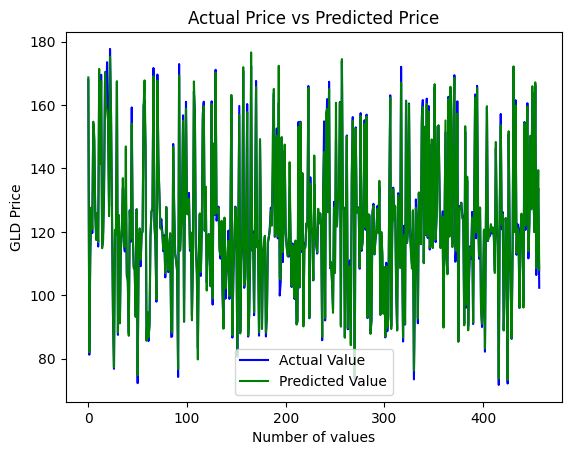

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

**Check the Error of pradiction Gold Values**

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893510917863055
